### 군집화 (100점)
- 데이터 선정(20):
> 어떠한 데이터라도 상관 없음 (캐글 데이터, 인터넷에서 구한 데이터, 직접 수집한 데이터 등) https://www.kaggle.com/datasets
>
> 데이터를 선정한 이유 서술
- 데이터 전처리(25) : 방법, 이유, 파이썬 코드
- 군집화 및 파라미터 최적화(30) : 방법, 이유, 파이썬 코드 
- 결과 및 분석, 고찰(25)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import sys
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
penguins = pd.read_csv('penguins_size.csv')
penguins.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='species', ylabel='count'>

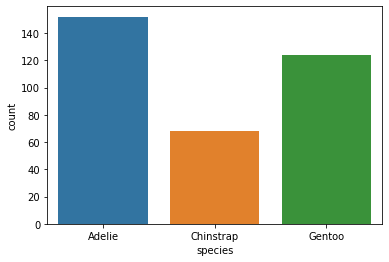

In [4]:
#exploring the data
sns.countplot(x = "species", data = penguins)

<AxesSubplot:xlabel='island', ylabel='count'>

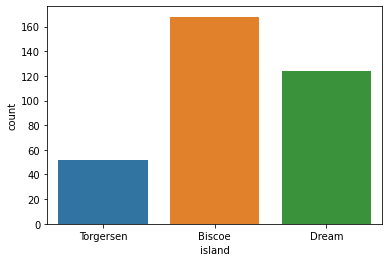

In [5]:
sns.countplot(x = "island", data = penguins)

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

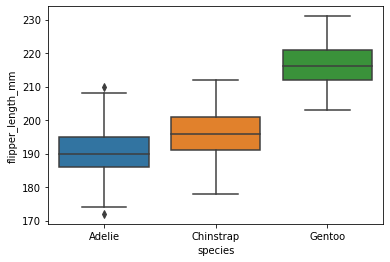

In [6]:
sns.boxplot(x = 'species', y = 'flipper_length_mm', data = penguins)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

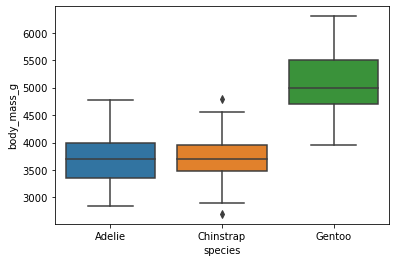

In [7]:
sns.boxplot(x = 'species', y = 'body_mass_g', data = penguins)

In [8]:
penguins.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [9]:
penguins["culmen_length_mm"] = penguins["culmen_length_mm"].fillna(value = penguins["culmen_length_mm"].mean())
penguins["culmen_depth_mm"] = penguins["culmen_depth_mm"].fillna(value = penguins["culmen_depth_mm"].mean())
penguins["flipper_length_mm"] = penguins["flipper_length_mm"].fillna(value = penguins["flipper_length_mm"].mean())
penguins["body_mass_g"] = penguins["body_mass_g"].fillna(value = penguins["body_mass_g"].mean())

In [10]:
penguins["sex"] = penguins["sex"].fillna('FEMALE')

In [11]:
penguins.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [12]:
penguins["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [13]:
penguins.drop(penguins[penguins["sex"]=='.'].index, inplace=True)

### Label Encoding

In [14]:
label_sex = LabelEncoder()
penguins["sexEnc"] = label_sex.fit_transform(penguins["sex"])
print("Encoded sex" + str(label_sex.classes_))

Encoded sex['FEMALE' 'MALE']


In [15]:
label_island = LabelEncoder()
penguins["islandEnc"] = label_island.fit_transform(penguins["island"])
print("Encoded island" + str(label_sex.classes_))

Encoded island['FEMALE' 'MALE']


In [16]:
label_species = LabelEncoder()
penguins["speciesEnc"] = label_species.fit_transform(penguins["species"])
print("Encoded species" + str(label_species.classes_))

Encoded species['Adelie' 'Chinstrap' 'Gentoo']


In [17]:
penguins = penguins.drop(['sex', 'island', 'species'],axis=1)

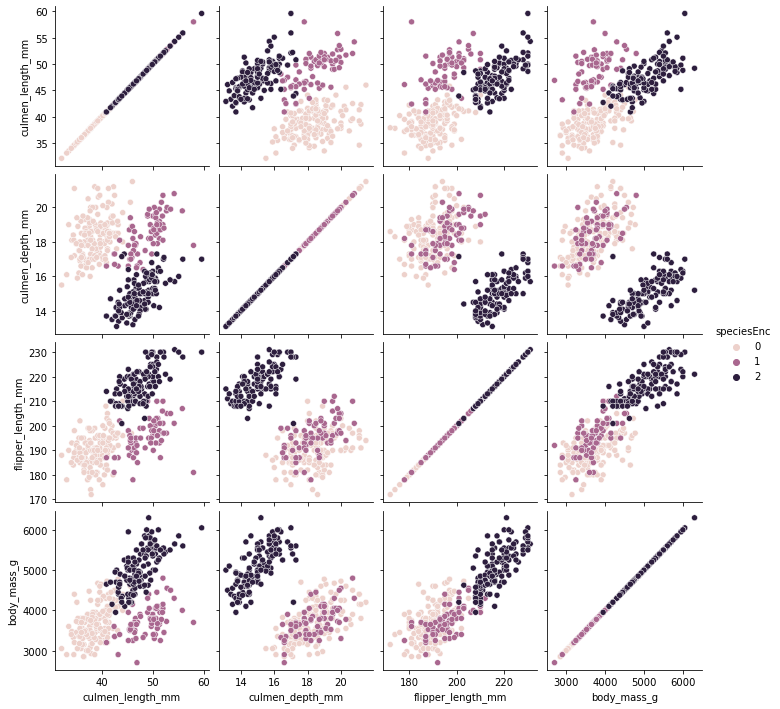

In [18]:
sns.pairplot(penguins.drop(['sexEnc', 'islandEnc'],axis=1), hue='speciesEnc', diag_kind=None)
plt.show()

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

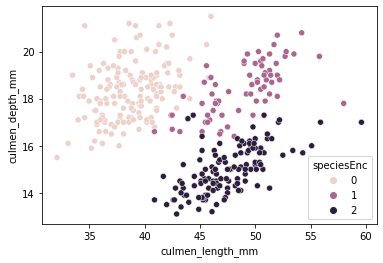

In [19]:
sns.scatterplot(x='culmen_length_mm',  y='culmen_depth_mm', hue='speciesEnc', data=penguins)

### KMeans

In [ ]:
penguins_k = penguins.copy()

In [ ]:
penguins_k.head()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
penguins_k['kmeans_label']=kmeans.fit_predict(penguins_k.drop(['speciesEnc', 'sexEnc', 'islandEnc', 
                                                           'flipper_length_mm', 'body_mass_g'], axis=1))

In [ ]:
sns.scatterplot(x='culmen_length_mm',  y='culmen_depth_mm', hue='kmeans_label', data=penguins_k)

In [ ]:
score_samples =silhouette_samples(penguins_k, penguins_k['kmeans_label'])
print(score_samples.shape)

penguins_k['silhouette_coeff'] = score_samples
average_score = silhouette_score(penguins_k, penguins_k['kmeans_label'])
print(average_score)

In [ ]:
penguins_k.groupby('kmeans_label')['silhouette_coeff'].mean()

In [ ]:
sns.heatmap(data = penguins.corr(), annot=True)

In [ ]:
penguins = penguins.drop(['sexEnc'], axis=1)

In [ ]:
penguins_k2 = penguins.copy()

In [ ]:
penguins_k2.info()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=1000)
penguins_k2['kmeans_label']=kmeans.fit_predict(penguins_k2.drop(['speciesEnc'], axis=1))

In [ ]:
sns.scatterplot(x='culmen_length_mm',  y='culmen_depth_mm', hue='kmeans_label', data=penguins_k2)

### LDA

In [20]:
penguins.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sexEnc,islandEnc,speciesEnc
0,39.10000,18.70000,181.000000,3750.000000,1,2,0
1,39.50000,17.40000,186.000000,3800.000000,0,2,0
2,40.30000,18.00000,195.000000,3250.000000,0,2,0
3,43.92193,17.15117,200.915205,4201.754386,0,2,0
4,36.70000,19.30000,193.000000,3450.000000,0,2,0


In [21]:
data_scaled = StandardScaler().fit_transform(penguins.iloc[:,:-1])

lda = LinearDiscriminantAnalysis(n_components=2)
data_lda = lda.fit(data_scaled, penguins.speciesEnc)
data_lda = lda.transform(data_scaled)

print(data_lda.shape)

(343, 2)


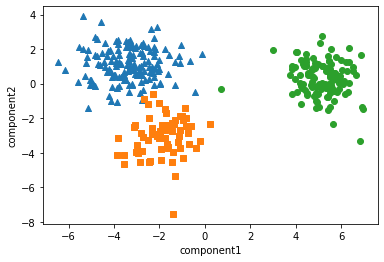

In [22]:
df_lda = pd.DataFrame(data_lda, columns=['component1','component2'])
df_lda['target']=penguins.speciesEnc

markers = ['^','s', 'o']
                                       
for i, marker in enumerate(markers):
    x_data = df_lda[df_lda['target'] == i]['component1']
    y_data = df_lda[df_lda['target'] == i]['component2']
    plt.scatter(x_data, y_data, marker=marker)
    
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

In [ ]:
df_lda_k = df_lda.copy()

In [ ]:
df_lda_k.head()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(df_lda_k.drop(['target'], axis=1))

In [ ]:
df_lda_k['cluster'] = kmeans.labels_
df_lda_k['component1'] = data_lda[:,0]
df_lda_k['component2'] = data_lda[:,1]

In [ ]:
marker0_index = df_lda_k[df_lda_k['cluster']==0].index
marker1_index = df_lda_k[df_lda_k['cluster']==1].index
marker2_index = df_lda_k[df_lda_k['cluster']==2].index

In [ ]:
plt.scatter(x=df_lda_k.loc[marker0_index, 'component1'], 
            y=df_lda_k.loc[marker0_index, 'component2'],
            marker='^')
plt.scatter(x=df_lda_k.loc[marker1_index, 'component1'], 
            y=df_lda_k.loc[marker1_index, 'component2'],
            marker='s')
plt.scatter(x=df_lda_k.loc[marker2_index, 'component1'], 
            y=df_lda_k.loc[marker2_index, 'component2'],
            marker='o')

In [ ]:
df_lda_k.describe()

In [ ]:
score_samples =silhouette_samples(df_lda_k, df_lda_k['cluster'])
print(score_samples.shape)

df_lda_k['silhouette_coeff'] = score_samples
average_score = silhouette_score(df_lda_k, df_lda_k['cluster'])
print(average_score)

In [ ]:
df_lda_k.groupby('kmeans_label')['silhouette_coeff'].mean()

### MeanShift

In [ ]:
df_lda_m = df_lda.copy()
df_lda_m.head()

In [ ]:
df_lda_m['target']=penguins.speciesEnc

x = data_lda
y = df_lda_m['target']

bw = estimate_bandwidth(x)
print(bw)

In [ ]:
meanshift = MeanShift(bandwidth=bw)
cluster_label_mshift = meanshift.fit_predict(x)
print(np.unique(cluster_label_mshift))

In [ ]:
df = pd.DataFrame(data=x, columns=['feature1', 'feature2'])
df['target'] = y

df['meanshift_label'] = cluster_label_mshift
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_label_mshift)

markers = ['^', 's', 'o']

for label in unique_labels:
    cluster_label_mshift = df[df['meanshift_label']==label]
    center = centers[label]
    plt.scatter(x=cluster_label_mshift['feature1'],
                y=cluster_label_mshift['feature2'],
                edgecolor='k',
                marker=markers[label])
    plt.scatter(x=center[0],
                y=center[1],
                s=200,
                color='gray',
                alpha=0.9,
                marker=markers[label])
    plt.scatter(x=center[0],
                y=center[1],
                s=100,
                color='k',
                edgecolor='k',
                marker='$%d$' % label)
plt.show()

### GMM( Gaussian Mixture Model )

In [23]:
df_lda_g = df_lda.copy()
df_lda_g.head()

,component1,component2,target
0,-5.219932,1.175308,0.0
1,-2.931260,0.596634,0.0
2,-3.355162,-0.456898,0.0
3,-0.437249,-0.489702,0.0
4,-4.712161,1.140793,0.0


In [25]:
df_lda_g['target'] = penguins.speciesEnc

gmm = GaussianMixture(n_components=3)
df_lda_g['cluster'] = gmm.fit_predict(df_lda_g.drop(['target'], axis=1)) 
print(df_lda_g.groupby(['target'])['cluster'].value_counts())

target  cluster
0.0     0          151
        2            1
1.0     2           66
        0            2
2.0     1          121
        2            1
Name: cluster, dtype: int64


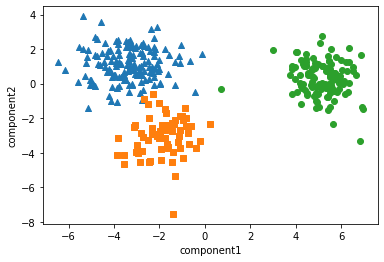

In [28]:
markers = ['^','s', 'o']
                                       
for i, marker in enumerate(markers):
    x_data = df_lda[df_lda_g['target'] == i]['component1']
    y_data = df_lda[df_lda_g['target'] == i]['component2']
    plt.scatter(x_data, y_data, marker=marker)
    
plt.xlabel('component1')
plt.ylabel('component2')
plt.show()

### DBSCAN